#***SASyHR Prototype Model***
#### ***Date: Tue 27/10/2021***

1. $S$: Susceptible
2. $E$: Exposed
3. $A$: Assymptomatic
4. $S_y$: Symptomatic
5. $H$: Hospitalised
6. $R$: Recovered

### ***Differential Equations***

### $\frac{dS}{dt}= -[\beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S]$

### $\frac{dE}{dt}= \beta_{A}\frac{A}{N}S + \beta_{S_y}\frac{S_y}{N}S- k_A E - k_{s_y}E$
### $\frac{dA}{dt}= k_A A  -\alpha A -\epsilon_A A$
### $\frac{dS_y}{dt}=  k_{s_y}S + \alpha A -\gamma_{S_y}S_y - \epsilon_{s_y}S_y $
### $\frac{dH}{dt}= \gamma_{S_y}S_y - \rho_h H$
### $\frac{dR}{dt}=  \rho_h H + \epsilon_A A + \epsilon_{s_y}S_y $


## **Model 1** ##
### Parameters - $\beta_{A}=3/4$, $\beta_{S_y}=2.5/6.5$, $k_A = 1, k_{s_y} = 1$,   $a=\frac{1}{10}$,$\gamma_{S_y} = \frac{1}{4}$, $\epsilon_A=\frac{1}{3}$, $\epsilon_{S_y}=\frac{1}{6.5}$, $\rho_h = 0.6$  ,$N=1000$, $A=15$, $Sy=5$ ###

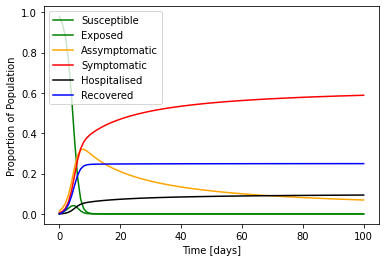

S[-1]= 0.0
E[-1]= 0.0
A[-1]= 2.54488287112005e+29
Sy[-1]= 2.170348134254889e+30
H[-1]= 3.450599744039145e+29
R[-1]= 9.199037091649145e+29


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, b_a, b_sy,k_a,k_sy,a, g_sy, e_a, e_sy, p_h):
    S = x[0]
    E = x[1]
    A = x[2]
    Sy = x[3]
    H = x[4]
    R = x[5]

    N = np.sum([S,E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S
    dEdt = (b_a/N)*A*S +(b_sy/N)*Sy*S - k_a*E - k_sy*E
    dAdt = k_a*A - e_a*A - a*A
    dSydt =  k_sy * Sy + a*A - g_sy * Sy - e_sy * Sy
    dHdt = g_sy * Sy - p_h * H
    dRdt = p_h* H + e_sy*Sy + e_a*A


    return [dSdt,dEdt, dAdt, dSydt, dHdt, dRdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [980,0, 15, 5,0, 0]  # Initial conditions for model variables: S, A, Sy, R
args = ((3/4), (2.5/6.5),1,1,1/10 ,(1/5), (1/4), (1/6.5), 0.6)  # Arguments for our model parameters: b_a, b_sy,a, g_sy, e_a, e_sy, p_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
E = solutions.y[1]
A = solutions.y[2]
Sy = solutions.y[3]
H = solutions.y[4]
R = solutions.y[5]
N = S+ E + A + Sy+ H +R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, E/N, label='Exposed', color='green')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='black')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))


## **Model 2** ##
### Parameters - $\beta_{A}=3/7$, $\beta_{S_y}=2.5/6.5$, $k_A = \frac{1}{4}, k_{s_y} = \frac{1}{2}$,   $a=\frac{1}{10}$, $a=\frac{1}{10}$,$\gamma_{S_y} = \frac{1}{4}$, $\epsilon_A=\frac{1}{7.5}$, $\epsilon_{S_y}=\frac{1}{6.5}$, $\rho_h = 0.6$  ,$N=1000$, $A=15$, $Sy=5$ ###


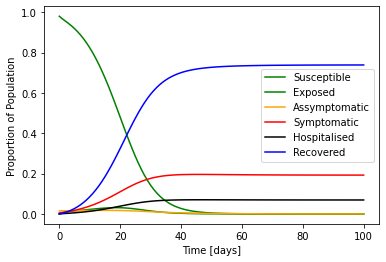

S[-1]= 2.0
E[-1]= 0.0
A[-1]= 79.0
Sy[-1]= 357817.0
H[-1]= 128493.0
R[-1]= 1373210.0


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_odes(t, x, b_a, b_sy,k_a,k_sy,a, g_sy, e_a, e_sy, p_h):
    S = x[0]
    E = x[1]
    A = x[2]
    Sy = x[3]
    H = x[4]
    R = x[5]

    N = np.sum([S,E, A, Sy, H, R])

    dSdt = -(b_a/N)*A*S -(b_sy/N)*Sy*S
    dEdt = (b_a*A*S)/N + (b_sy*Sy*S)/N - k_a*E - k_sy * E
    dAdt = k_a*A - e_a*A - a*A
    dSydt =  k_sy * Sy + a*A - g_sy * Sy - e_sy * Sy
    dHdt = g_sy * Sy - p_h * H
    dRdt = p_h* H + e_sy*Sy + e_a*A

    return [dSdt,dEdt, dAdt, dSydt, dHdt, dRdt]

t_span = np.array([0, 100])  # Interval of integration (time limits)
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Values of time
x_0 = [980,0, 15, 5,0, 0]  # Initial conditions for model variables: S, A, Sy, R
args = ((3/7), (2.5/6.5),1/4,1/2,1/10 ,(1/4), (1/7.5), (1/6.5), 0.6)  # Arguments for our model parameters: b_a, b_sy,a, g_sy, e_a, e_sy, p_h

solutions = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)
S = solutions.y[0]
E = solutions.y[1]
A = solutions.y[2]
Sy = solutions.y[3]
H = solutions.y[4]
R = solutions.y[5]
N = S+ E + A+Sy+H +R

plt.plot(t, S/N, label='Susceptible', color='green')
plt.plot(t, E/N, label='Exposed', color='green')
plt.plot(t, A/N, label='Assymptomatic', color='orange')
plt.plot(t, Sy/N, label='Symptomatic', color='red')
plt.plot(t, H/N, label='Hospitalised', color='black')
plt.plot(t, R/N, label='Recovered', color='blue')
plt.xlabel('Time [days]')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

print('S[-1]=', round(S[-1], 0))
print('E[-1]=', round(E[-1], 0))
print('A[-1]=', round(A[-1], 0))
print('Sy[-1]=', round(Sy[-1], 0))
print('H[-1]=', round(H[-1], 0))
print('R[-1]=', round(R[-1], 0))